In [ ]:
import numpy as np
from scipy import sparse as sp
import random
import networkx as nx
import matplotlib.pyplot as plt

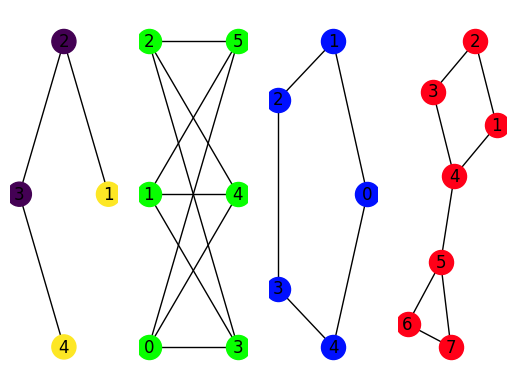

In [220]:
#Example graphs

B = nx.Graph()
B.add_nodes_from(range(1, 4))
B.add_edges_from([(1, 2), (2, 3), (3, 4)])

G = nx.complete_bipartite_graph(3, 3)

H = nx.cycle_graph(5)

S = nx.Graph()
S.add_nodes_from(range(1, 7))
S.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (4, 5), (5, 6), (6, 7), (7, 5)])

#Example graph plots

def get_cmap(n, name='hsv'): #Function to generate colors for graphs and plots
    return plt.get_cmap(name, n)

colorset = get_cmap(4)

subax0 = plt.subplot(141)
nx.draw(B, pos = nx.circular_layout(B), with_labels = True, node_color = colorset(0))
subax1 = plt.subplot(142)
nx.draw(G, pos = nx.bipartite_layout(G, [0, 1, 2]), with_labels = True, node_color = colorset(1))
subax2 = plt.subplot(143)
nx.draw(H, pos = nx.circular_layout(H), with_labels = True, node_color = colorset(2))
subax3 = plt.subplot(144)
nx.draw(S, pos = nx.kamada_kawai_layout(S), with_labels = True, node_color = colorset(3))

In [262]:
class Spectral_Graph_Plot: 
    #A class to make MatPlotLib plots of the various eigenvalues and eigenvectors of a graph G.
    
    def __init__(self, G, sparse_factor = 0): 
        #sparse_factor determines level of detail by limiting number of calculated eigenvalues. Only used in SciPy implementation, is kindof weird.
        #Note: nx.graph.order() returns order numbering indexed from 1, not 0, so to determine the maximum spectrum number k, take G.order() - 2.
        
        self.G = G
        
        self.k = G.order()
        self.sparse_factor = sparse_factor
        
        if sparse_factor > self.k or sparse_factor == 0:
            self.sparse_factor = self.k
            print('Sparse factor greater than k input. Sparse factor defaulted to k.')
        
        '''self.Laplacian_G = sp.csr_matrix(nx.laplacian_matrix(G)).asfptype()''' #Takes CSR formatted NetworkX Laplacian and produces SciPy Float CSR, necessary for Linalg method.
        '''self.eigval_Lap_G, self.eigvec_Lap_G = sp.linalg.eigsh(self.Laplacian_G, k = self.sparse_factor)''' #Not producing proper eigenvalues
        
        #Slow way doing it with Numpy, figure out faster way to do it maybe with SciPy. Failed implementation above.
        self.Laplacian_G = sp.csr_matrix(nx.laplacian_matrix(G)).toarray()
        self.eigval_Lap_G, self.eigvec_Lap_G = np.linalg.eig(self.Laplacian_G)
        
        self.eigvec_Lap_G = np.transpose(self.eigvec_Lap_G) #Fixes wonky construction of eigenvectors
        self.spectrum = list(zip(self.eigval_Lap_G, self.eigvec_Lap_G))
        self.spectrum = tuple(sorted(self.spectrum, key = lambda x:x[0]))
            
    def graph_full_spectrum(self):
        fig1, ax1 = plt.subplots()
        
        fig1.suptitle('Spectra of G')
        fig_colors = get_cmap(self.sparse_factor + 1)
        
        ax1.set_xlim([1, self.G.order()])
        ax1.set_ylim([-1, 1])
        
        for i in range(0, self.sparse_factor):
            spectrum_x = range(1, len(self.spectrum[i][1]) + 1)
            spectrum_y = self.spectrum[i][1]
            ax1.plot(spectrum_x, spectrum_y,
                     label = f'$\\lambda_{i} = {(self.spectrum[i][0])}$',
                     color = fig_colors(i),
                     lw = 7)

        ax1.legend(loc = 'upper right')
        plt.show()

Sparse factor greater than k input. Sparse factor defaulted to k.


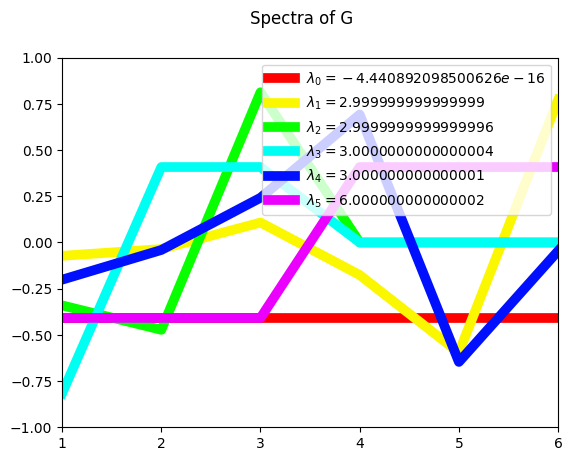

In [264]:
spec_B = Spectral_Graph_Plot(G)
spec_B.graph_full_spectrum()